In this notebook, we load the results of the Euler sweeps for linear systems and plot them. Lets start with pareto frontiers for the 50 dimensional systems in the unconstrained case.

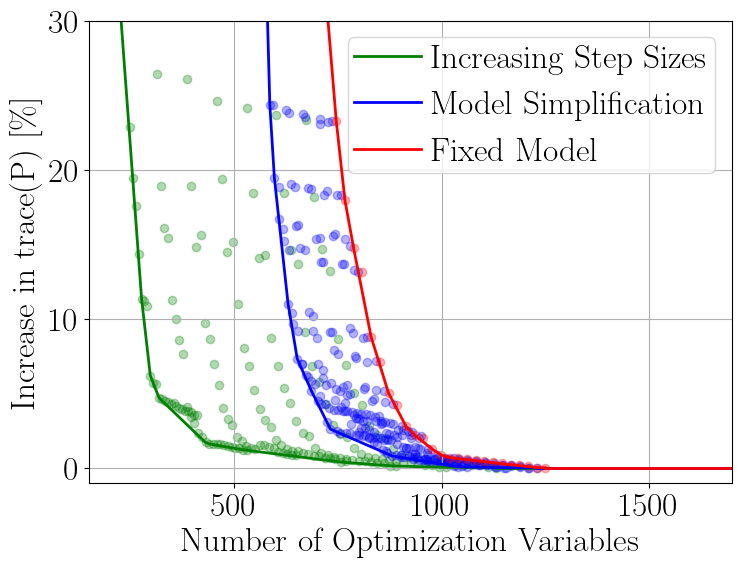

In [1]:
import pickle
from utils_shared import get_dir
from linear_systems.plotting_utils_linear_systems import create_filtered_trace_increase_plot, plot_min_lookahead_vs_optimization_vars, create_filtered_cost_vs_time_plot

# --- Load the results from the pickle file ---
data_dir = get_dir("data/linear_systems")
results_file_stable = data_dir / "unconstrained/n50_nu0_lh2.0789473684210527_results_46.pkl" #"results/n50_nu0_aggregated.pkl"
with open(results_file_stable, "rb") as f:
    results_stable = pickle.load(f)

# --- Define filter conditions ---

filters = [
    (lambda res: res.get('rate', 0) > 1.0, 'green', 'Increasing Step Sizes'),
    (lambda res: len(res.get('schedule', [])) > 1 and res.get('is_stable', 0), 'blue', 'Model Simplification'),
    (lambda res: len(res.get('schedule', [])) == 1 and res.get('rate', 0) <= 1.0 + 1e-6, 'red', 'Fixed Model')
]

# --- Plot Percentage Increase in Trace(P) ---
create_filtered_trace_increase_plot(results_stable, filters, filename="n50_nu0_lh2.0")

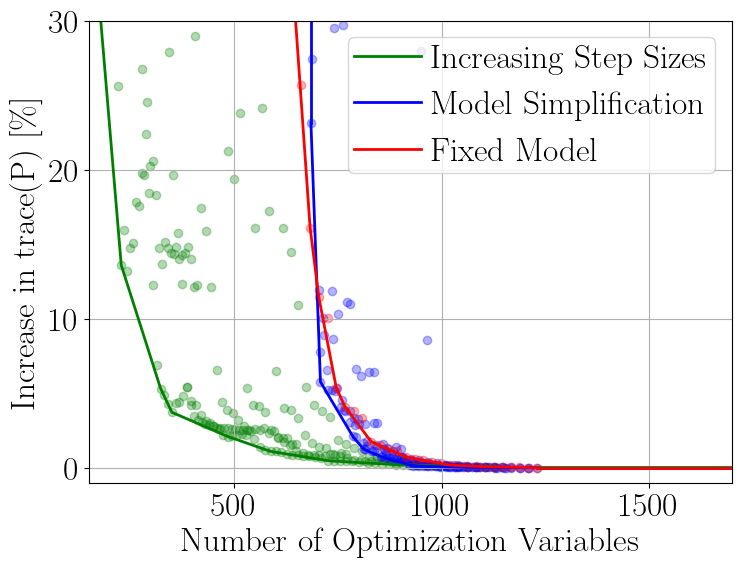

In [2]:
# --- Load the results from the pickle file ---
data_dir = get_dir("data/linear_systems")
results_file_unstable = data_dir / "unconstrained/n50_nu1_lh2.0789473684210527_results_66.pkl" #"results/n50_nu0_aggregated.pkl"
with open(results_file_unstable, "rb") as f:
    results_unstable = pickle.load(f)

# --- Plot Percentage Increase in Trace(P) ---
create_filtered_trace_increase_plot(results_unstable, filters, filename="n50_nu1_lh2.0")

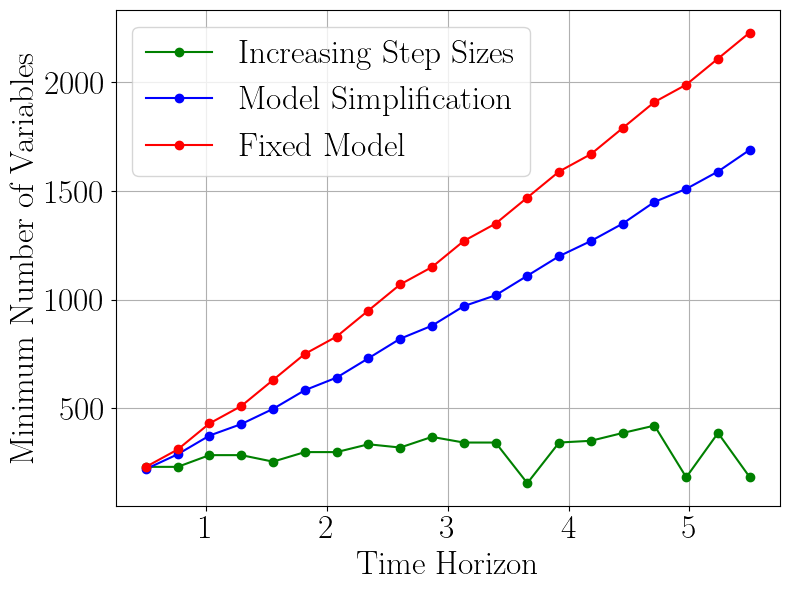

In [3]:
# --- Load the results from the pickle file ---
data_dir = get_dir("data/linear_systems")
results_file_stable_aggregated = data_dir / "unconstrained/n50_nu0_aggregated.pkl" #"results/n50_nu0_aggregated.pkl"
with open(results_file_stable_aggregated, "rb") as f:
    results_stable_aggregated = pickle.load(f)

# --- Plot Lookahead Distance vs. Optimization Variables ---
trace_threshold = 10.0  # Define threshold for trace percentage increase
plot_min_lookahead_vs_optimization_vars(results_stable_aggregated, filters, trace_threshold, plot_uncondensed=True, plot_condensed=False, filename="n50_n0_min")

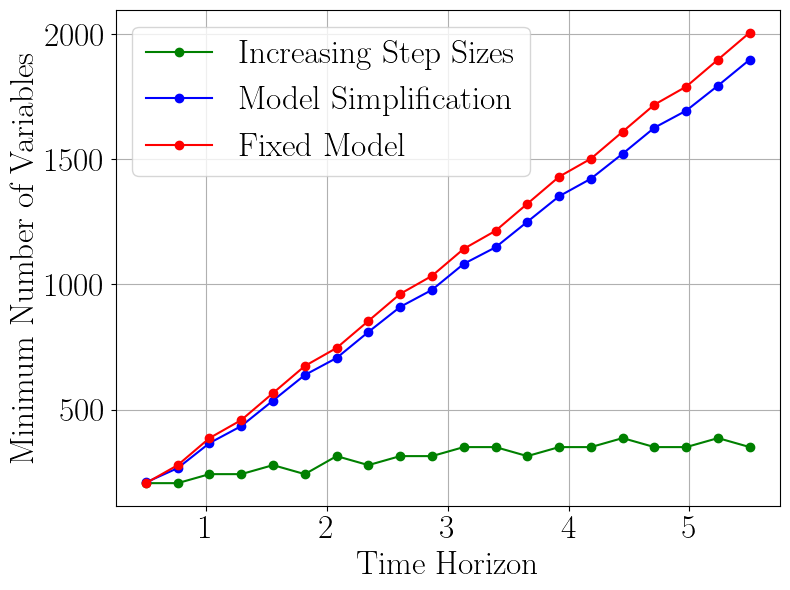

In [4]:
# --- Load the results from the pickle file ---
data_dir = get_dir("data/linear_systems")
results_file_unstable_aggregated = data_dir / "unconstrained/n50_nu1_aggregated.pkl" #"results/n50_nu0_aggregated.pkl"
with open(results_file_unstable_aggregated, "rb") as f:
    results_unstable_aggregated = pickle.load(f)

# --- Plot Lookahead Distance vs. Optimization Variables ---
trace_threshold = 10.0  # Define threshold for trace percentage increase
plot_min_lookahead_vs_optimization_vars(results_unstable_aggregated, filters, trace_threshold, plot_uncondensed=True, plot_condensed=False, filename="n50_n1_min")

Next, the pareto frontiers for constrained SS tracking, the problems were solved via HPIPM.

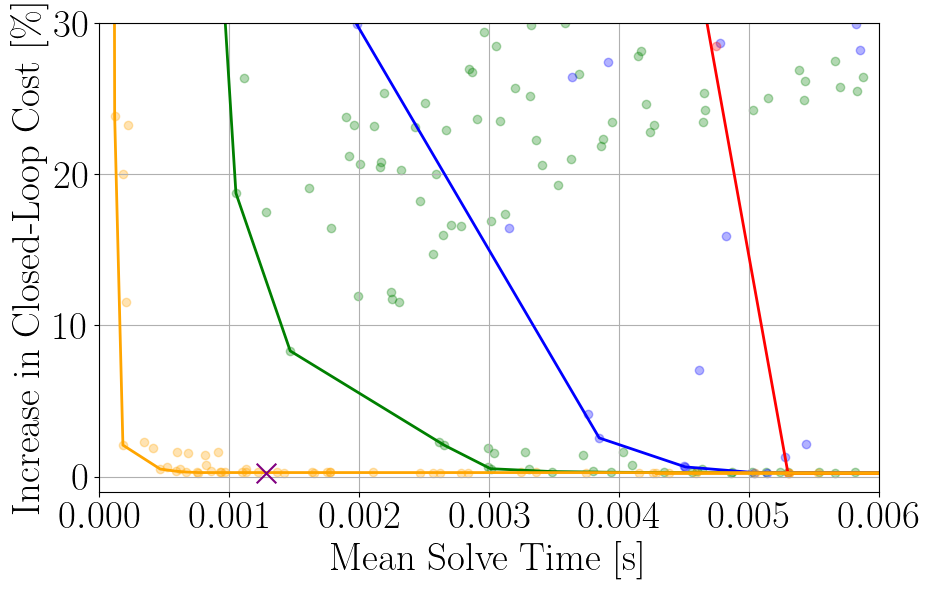

In [ ]:
results_file_stable_aggregated = data_dir / "constrained/n50_nu0_nonoise_aggregated_total.pkl" 
with open(results_file_stable_aggregated, "rb") as f:
    results_stable_aggregated = pickle.load(f)

filters = [
            (lambda res: res.get('experiment_opts', {}).get('rate', []) > 1 and len(res.get('experiment_opts', {}).get('schedule', [])) == 1 and res.get("is_condensed") == False, 'green', 'Increasing Step Sizes'),
            (lambda res: res.get('experiment_opts', {}).get('rate', []) - 1.0 < 1e-6 and len(res.get('experiment_opts', {}).get('schedule', [])) > 1 and res.get("is_condensed") == False, 'blue', 'Model Simplification'),
            (lambda res: res.get('experiment_opts', {}).get('rate', []) - 1.0 < 1e-6 and len(res.get('experiment_opts', {}).get('schedule', [])) == 1 and res.get("is_condensed") == False, 'red', 'Fixed Model'), 
            (lambda res: res.get('experiment_opts', {}).get('rate', []) > 1 and len(res.get('experiment_opts', {}).get('schedule', [])) == 1 and res.get("is_condensed") == True, 'orange', 'Incr. Step Sizes (condensed)'),
            (lambda res: res.get('experiment_opts', {}).get('rate', []) - 1.0 < 1e-6 and len(res.get('experiment_opts', {}).get('schedule', [])) == 1 and res.get("is_condensed") == True, 'purple', 'Fixed Model (condensed)'), 
        ]

create_filtered_cost_vs_time_plot(results_stable_aggregated, filters, filter_constraints=True, epsilon=0.1,legend=True, filename="n50_n0_lh2_constrained")

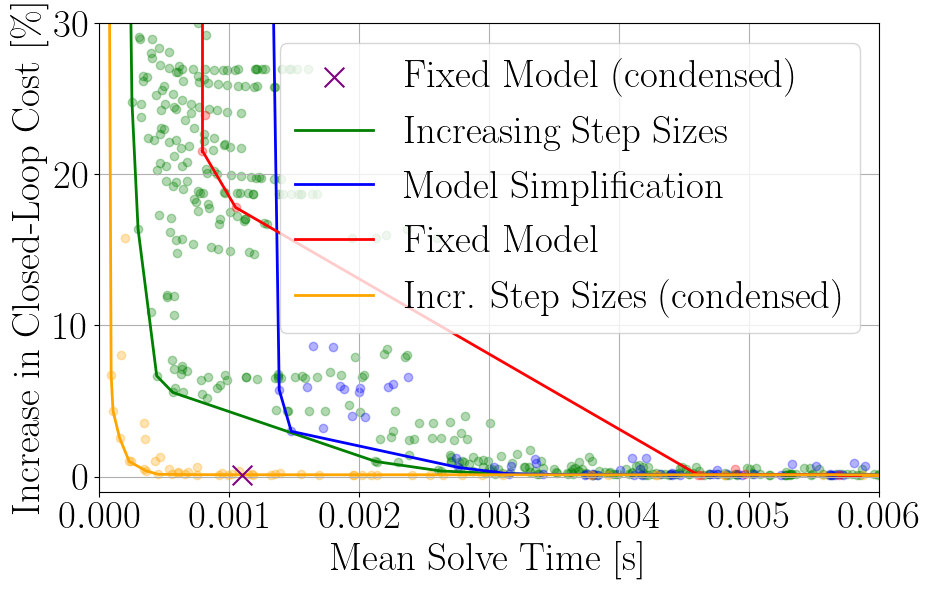

In [6]:
results_file_unstable_aggregated = data_dir / "constrained/n50_nu1_nonoise_aggregated_total.pkl" 
with open(results_file_unstable_aggregated, "rb") as f:
    results_unstable_aggregated = pickle.load(f)

create_filtered_cost_vs_time_plot(results_unstable_aggregated, filters, filter_constraints=True, epsilon=0.1,legend=True, filename="n50_n1_lh2_constrained")